### Resultados simulaciones

Se revisan los resultados de las simulaciones con la red GRG (Graph Random Growth) con conectividades .1, .2, ..., .9, 1. También se realizó el ejercicio con cuatro números de agente: 10, 11, 100 y 101.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se cargan los datos de las simulaciones con Numero_agentes:

In [6]:
Numero_agentes = 100
names=['Identificador','Numero_agentes','Tipo_red','Agente','Ronda','Estado','Puntaje','Politica','Parametro-0','Parametro-1']
df_list = []
for p in range(0, 11):
    archivo = "./data/simulaciones-GRG-" + str(Numero_agentes)  + "-" + str(p) + ".csv"
    try:
        df_list.append(pd.read_csv(archivo, names=names, header=None))
    except:
        pass

data = pd.concat(df_list)
data = data.iloc[1:]
data['Ronda'] = data['Ronda'].astype(int)
data['Estado'] = data['Estado'].astype(int)
data['Parametro-1'] = data['Parametro-1'].astype(str)
data['Parametro-1'] = data['Parametro-1'].apply(lambda x: float(x[:3]))

In [16]:
data.head()

,Identificador,Numero_agentes,Tipo_red,Agente,Ronda,Estado,Puntaje,Politica,Parametro-0,Parametro-1
1,2200,100,GRG,0,10,1,1,6,100,0.0
2,2200,100,GRG,0,20,1,1,6,100,0.0
3,2200,100,GRG,0,30,1,1,6,100,0.0
4,2200,100,GRG,0,40,1,1,6,100,0.0
5,2200,100,GRG,0,50,1,1,6,100,0.0


**Asistencia**

Text(0, 0.5, 'Promedio asistencia ultimas rondas\nsobre 100 simulaciones')

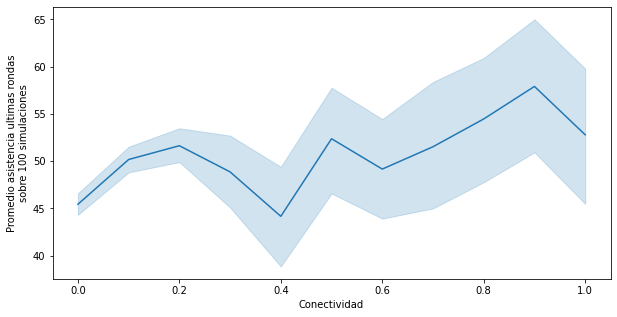

In [7]:
aux = data.groupby(['Parametro-1', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

aux['Asistencia_total'] = (aux['Asistencia_total']/Numero_agentes)*100 
rondas = aux['Ronda'].unique()
aux = aux[aux['Ronda'] > rondas[-5]]
aux = aux.groupby(['Parametro-1', 'Identificador'])['Asistencia_total']\
    .mean().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Asistencia_total']
fig = plt.subplots(figsize=(10,5))
sns.lineplot(x=aux['Parametro-1'], y=aux['Asistencia_total'])#, hue=aux['Tipo_red'])
plt.xlabel('Conectividad')
plt.ylabel('Promedio asistencia ultimas rondas\nsobre 100 simulaciones')

#### Asistencia óptima

Text(0, 0.5, 'Promedio asistencia óptima\nsobre 100 simulaciones')

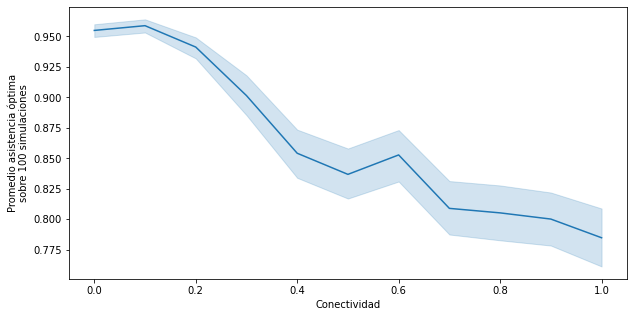

In [8]:
aux = data.groupby(['Parametro-1', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

# Proporción de asistencia
aux['Asistencia'] = aux['Asistencia_total']/Numero_agentes
# Distancia al cuadrado entre proporción de asistencia y 0.5
aux['diferencia_con_umbral'] = (aux['Asistencia'] - 0.5)*(aux['Asistencia'] - 0.5)
num_rondas = aux.Ronda.max() + 1
df = aux.groupby(['Parametro-1', 'Identificador'])['diferencia_con_umbral'].sum().reset_index()
df['Asistencia_optima'] = df['diferencia_con_umbral']/num_rondas
df['Asistencia_optima'] = 1 - 2 * np.sqrt(df['Asistencia_optima'])
fig = plt.subplots(figsize=(10,5))
sns.lineplot(x=df['Parametro-1'], y=df['Asistencia_optima'])#, hue=df['Tipo_red'])
plt.xlabel('Conectividad')
plt.ylabel('Promedio asistencia óptima\nsobre 100 simulaciones')

#### Recompensa total

In [9]:
data_aux = data.copy()
data_aux['Puntaje normalizado'] = data_aux['Puntaje'] + 1
data_aux = data_aux.groupby(['Parametro-1', 'Identificador', 'Agente'])['Puntaje normalizado'].mean().reset_index()
data_aux = data_aux.groupby(['Parametro-1', 'Identificador'])['Puntaje normalizado'].mean().reset_index()
data_aux.head()

,Parametro-1,Identificador,Puntaje normalizado
0,0.0,2200,1.318
1,0.0,2201,1.041
2,0.0,2202,1.497
3,0.0,2203,1.408
4,0.0,2204,1.037


Text(0, 0.5, 'Puntaje NORMALIZADO promedio\n sobre 100 simulaciones')

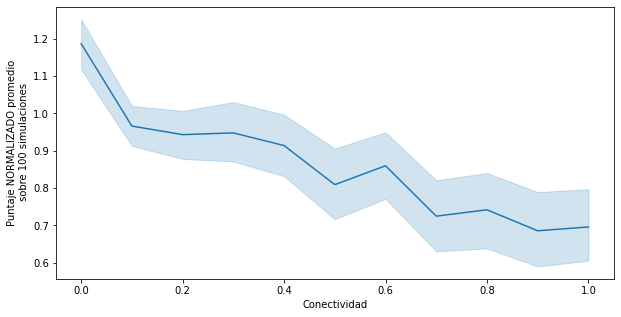

In [10]:
fig = plt.subplots(figsize=(10,5))
sns.lineplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Puntaje normalizado'],
#    hue=data_aux['Tipo_red']
)
plt.xlabel('Conectividad')
plt.ylabel('Puntaje NORMALIZADO promedio\n sobre 100 simulaciones')

#### Distribución de la recompensa

In [11]:
def gini1(x):
    x = np.asarray(x) 
    sorted_x = np.sort(x) 
    n = len(x) 
    cumx = np.cumsum(sorted_x, dtype=float)
    try:
        gini = (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    except:
        gini = 0
    return np.round(gini,3)

Text(0, 0.5, 'Índice de Gini')

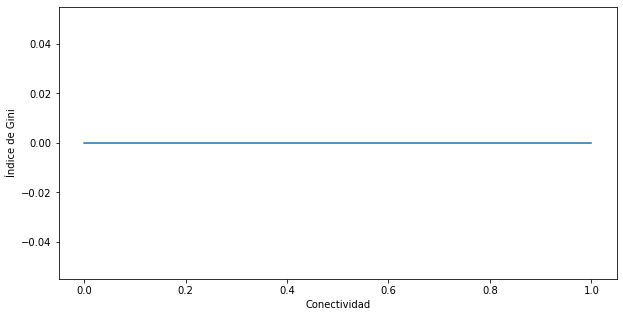

In [12]:
data_aux['Gini'] = data_aux.groupby(['Parametro-1','Identificador'])['Puntaje normalizado'].transform(func = gini1)
fig = plt.subplots(figsize=(10,5))
sns.lineplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Gini'],
#    hue=data_aux['Tipo_red']
)
plt.xlabel('Conectividad')
plt.ylabel('Índice de Gini')

**Fijar un número de agentes**

In [13]:
df = pd.DataFrame(data.groupby(['Parametro-1', 'Identificador', 'Ronda','Politica'])['Agente'].count()).reset_index()
df.columns = ['Parametro-1', 'Identificador', 'Ronda','Politica', 'cantidad_agentes']
df = df.groupby(['Parametro-1', 'Ronda','Politica'])['cantidad_agentes'].mean().reset_index()
df.head(2)

,Parametro-1,Ronda,Politica,cantidad_agentes
0,0.0,0,0,12.42
1,0.0,0,1,12.69


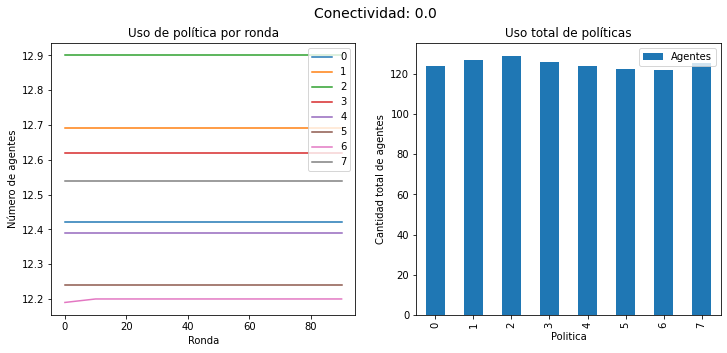

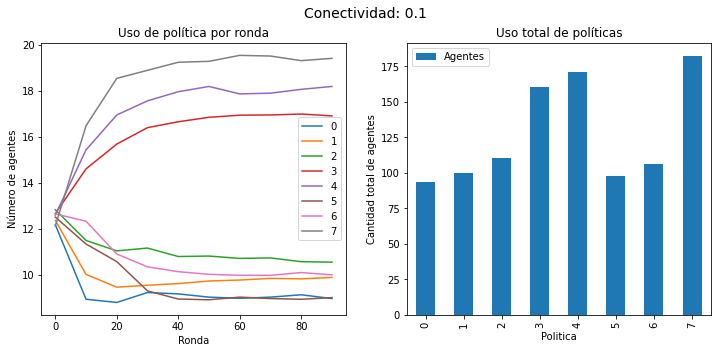

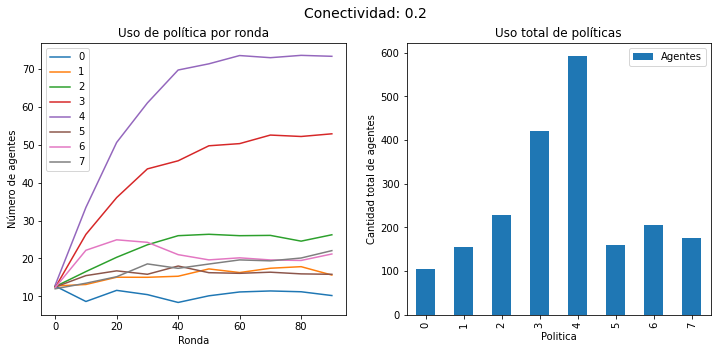

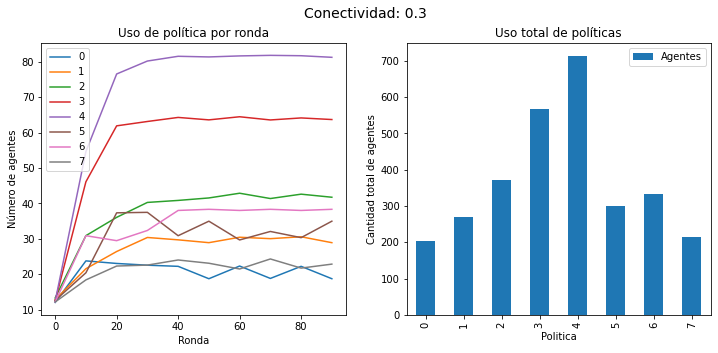

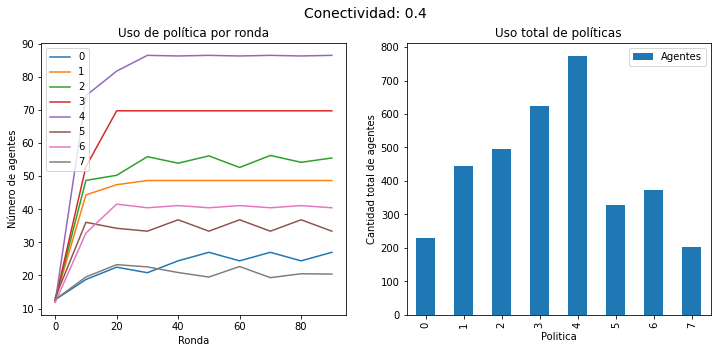

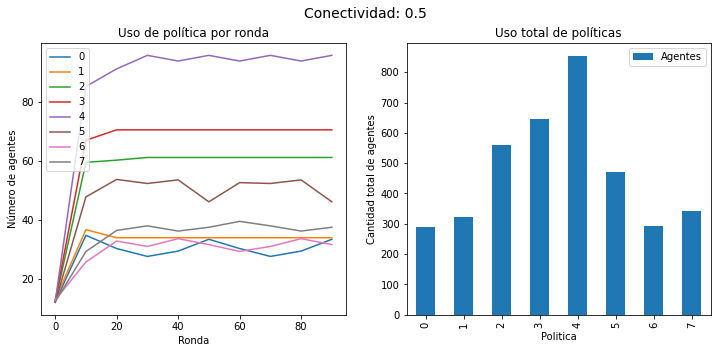

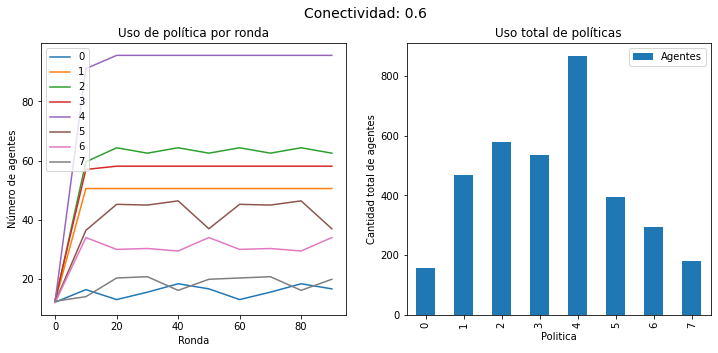

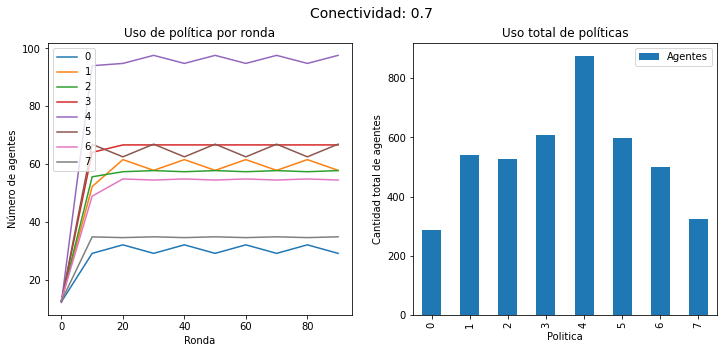

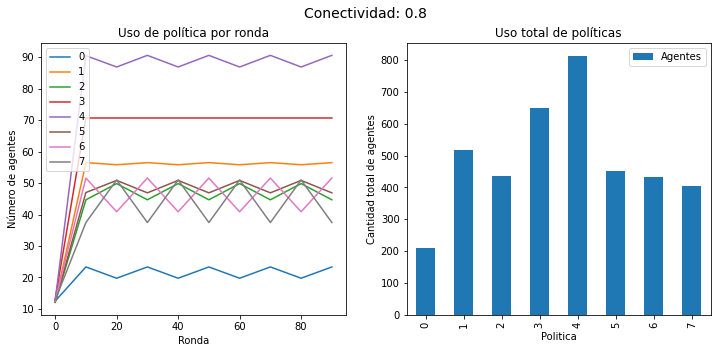

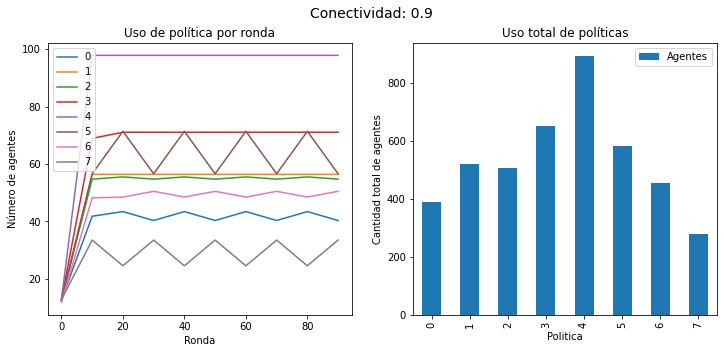

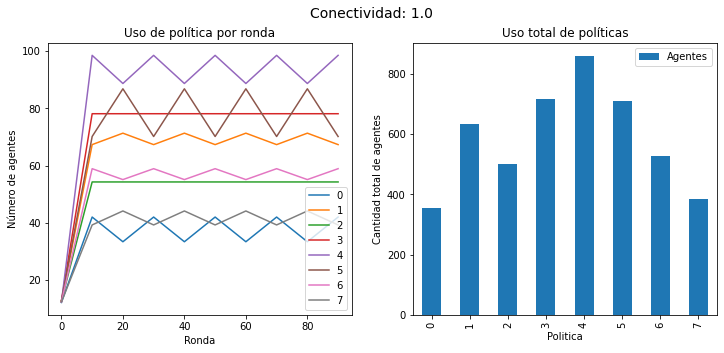

In [14]:
#sns.set_palette("Paired")
for r, grp in df.groupby('Parametro-1'):
    fig, ax = plt.subplots(1,2,figsize = (12,5))
    #sns.lineplot(
    #            x=grp['Ronda'], 
    #            y=grp['cantidad_agentes'],
    #            hue=grp['Politica'],
    #            ax=ax[0]
    #        )
    for label, group in grp.groupby('Politica'):
        group.plot(x='Ronda', y='cantidad_agentes', ax=ax[0],label=label)
    #ax[0].set_ylim([0,Num_agentes+1])
    ax[0].set_title('Uso de política por ronda')
    ax[0].set_ylabel('Número de agentes')
    df1 = pd.DataFrame(grp.groupby('Politica')['cantidad_agentes'].sum())
    df1.columns = ['Agentes']
    #ax[1].plot(df.index, df['Agentes'])
    df1.plot(kind="bar", ax = ax[1])
    ax[1].set_title('Uso total de políticas')
    ax[1].set_ylabel('Cantidad total de agentes')
    fig.suptitle('Conectividad: ' + str(r), fontsize=14)

In [25]:
df = data.groupby(['Parametro-1', 'Politica', 'Identificador'])['Puntaje'].mean().reset_index()
df.head()

,Parametro-1,Politica,Identificador,Puntaje
0,0.0,0,2200,-0.033333
1,0.0,0,2201,-0.063636
2,0.0,0,2202,0.030000
3,0.0,0,2203,0.057143
4,0.0,0,2204,-0.046667


In [43]:
data['Politica_lag'] = data.groupby(['Parametro-1', 'Identificador', 'Agente'])['Politica'].transform('shift', -1)

In [46]:
data[(data['Politica']==0) & (data['Ronda']==0)]['Puntaje'].value_counts()

 0    6839
-1    3425
 1    3345
Name: Puntaje, dtype: int64

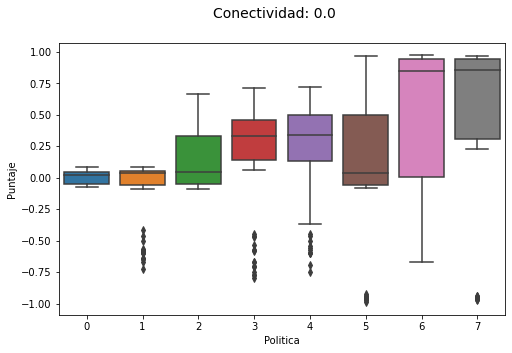

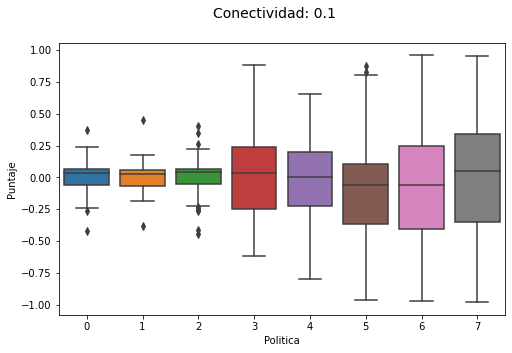

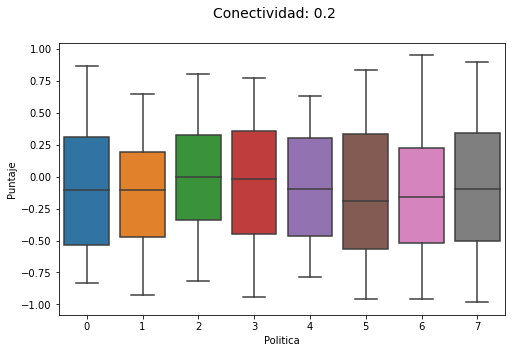

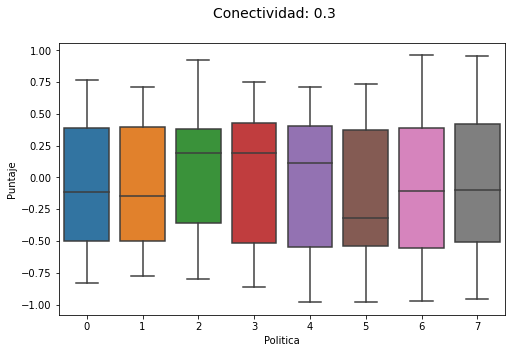

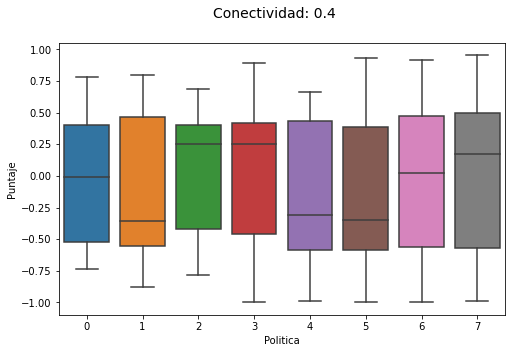

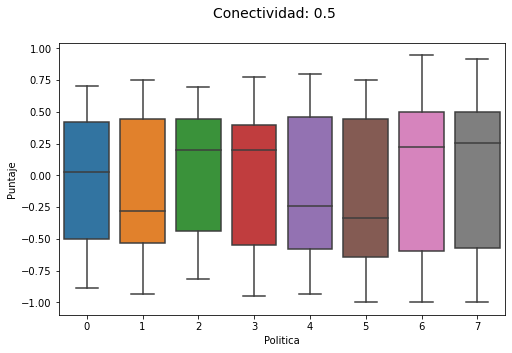

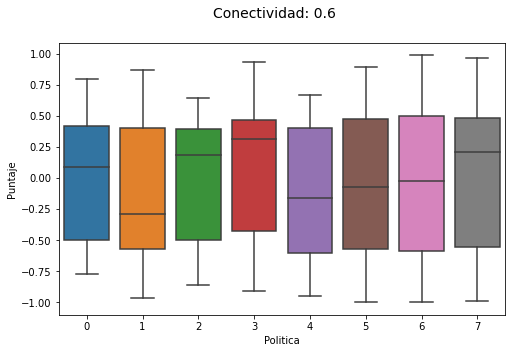

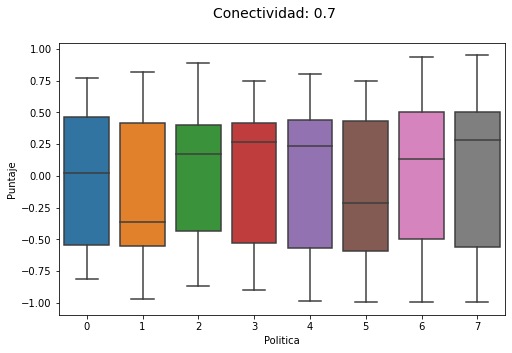

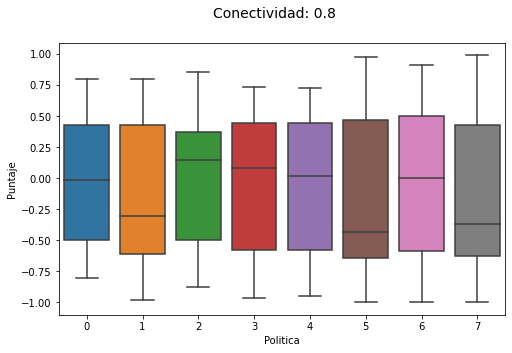

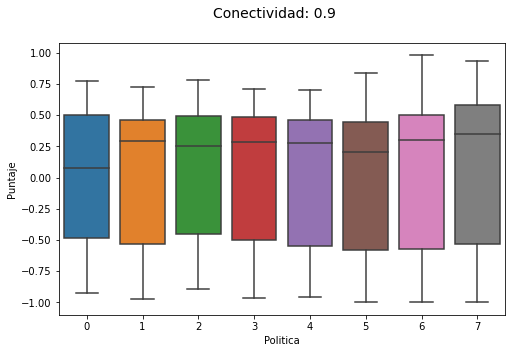

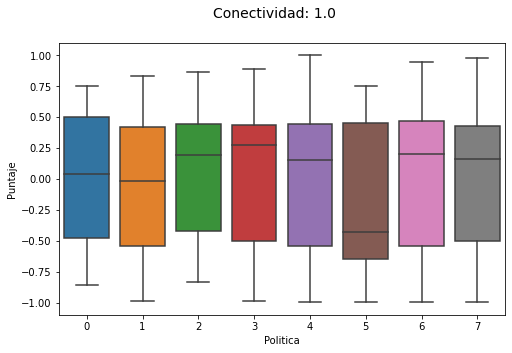

In [26]:
for p, grp in df.groupby('Parametro-1'):
    fig, ax = plt.subplots(1,1,figsize = (8,5))
    sns.boxplot(x=grp['Politica'], y=grp['Puntaje'])
    fig.suptitle('Conectividad: ' + str(p), fontsize=14)